## **Setup**

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set working directory to the script's directory
os.chdir(os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd())


## **Data Preparation**

In [3]:
# Load dataset
file_path = "../data/data_censored.csv"
data = pd.read_csv(file_path)

# Ensure necessary columns exist
required_columns = {'age', 'x1', 'x2', 'x3', 'treatment', 'outcome', 'eligible', 'censored'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Missing required columns: {required_columns - set(data.columns)}")

## **Clustering Mechanism**

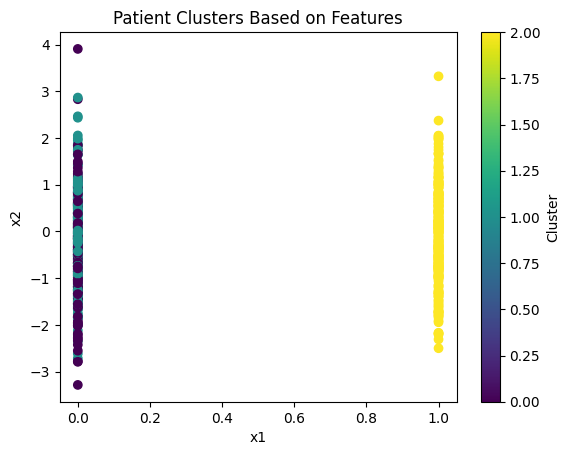

In [ ]:
# Select relevant features for clustering
cluster_data = data[['age', 'x1', 'x2', 'x3']]

# Standardize features for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform clustering (e.g., k-means with k=3)
kmeans = KMeans(n_clusters=3, random_state=123, n_init=25)
data['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis')
plt.title("Patient Clusters Based on Features")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Cluster")
plt.show()

## **Adherance Analysis**

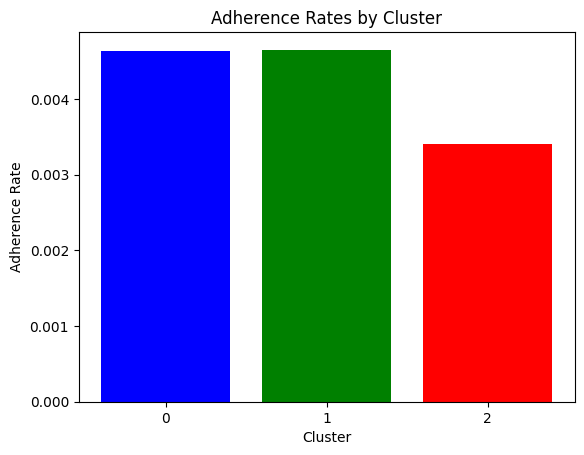

In [ ]:
data['adherence'] = np.where((data['treatment'] == 1) & (data['outcome'] == 1), 1, 0)
adherence_rates = data.groupby('cluster')['adherence'].mean().reset_index()

# Visualize adherence rates
plt.bar(adherence_rates['cluster'], adherence_rates['adherence'], color=['blue', 'green', 'red'])
plt.title("Adherence Rates by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Adherence Rate")
plt.xticks(adherence_rates['cluster'])
plt.show()

## **Baseline Risk Stratification**

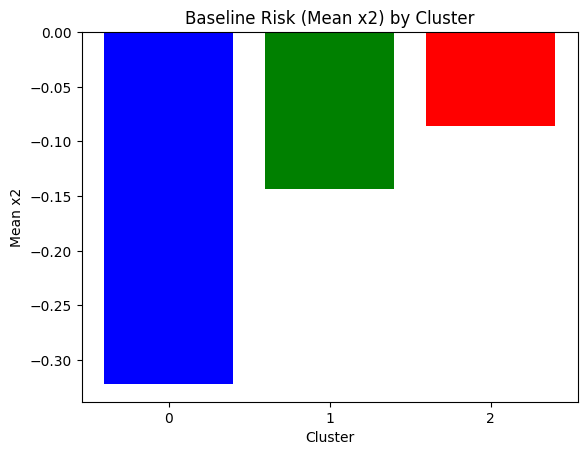

In [ ]:
baseline_risk = data.groupby('cluster')['x2'].mean().reset_index()

# Visualize baseline risk
plt.bar(baseline_risk['cluster'], baseline_risk['x2'], color=['blue', 'green', 'red'])
plt.title("Baseline Risk (Mean x2) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean x2")
plt.xticks(baseline_risk['cluster'])
plt.show()

## **Actionable Recommendation**

In [ ]:
print("Adherence Rates by Cluster:")
print(adherence_rates)
print("\nRecommendation: Implement cluster-specific adherence support programs.\n")

print("Baseline Risk (Mean x2) by Cluster:")
print(baseline_risk)
print("\nRecommendation: Use baseline risk stratification to allocate treatments more effectively.\n")


Adherence Rates by Cluster:
   cluster  adherence
0        0   0.004630
1        1   0.004651
2        2   0.003401

Recommendation: Implement cluster-specific adherence support programs.

Baseline Risk (Mean x2) by Cluster:
   cluster        x2
0        0 -0.321909
1        1 -0.143875
2        2 -0.086259

Recommendation: Use baseline risk stratification to allocate treatments more effectively.

